# Load: Importing datasets and packages

In [1]:
from google.colab import drive
import pandas as pd
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%pushd "/content/drive/MyDrive/Colab Notebooks/datathon"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/datathon


['/content']

In [3]:
df_cat = pd.read_csv("product_categories.csv")
df_trans = pd.read_csv("transactions.csv")
df_sess = pd.read_csv("sessions.csv")

# Merging Files and Data Cleaning

## 1. Merge the 3 csv files including session, transactions and product categories

### Step 1:  Since we cannot merge the 3 files altogether, we'll merge the two first with another follows.

In [4]:
# merge the transaction and product categories fle
df_trans_cat = pd.merge(
    df_trans,
    df_cat,
    left_on='prod_category_id',
    right_on='Product Category ID',
    how='left'
)


In [5]:
# now, let's merge the file of transaction joined with product categories with session file using its unique information of each machine id (e.g. take the one that appears first, or my computer would explode)
df_demo = df_sess.drop_duplicates(subset="machine_id")

# try to merge the 3 csc files
df_merged = pd.merge(
    df_trans_cat,
    df_demo,
    on="machine_id",
    how="left"
)


### Step 2:  Check the merged dataframe

In [6]:
df_merged.shape
# check the merged dataframe shape

(2308972, 38)

In [7]:
df_merged.columns
# check the merged dataframe column

Index(['machine_id', 'site_session_id_x', 'prod_category_id', 'prod_name',
       'domain_id_x', 'prod_qty', 'prod_totprice', 'basket_tot',
       'event_date_x', 'event_time_x', 'domain_name_x',
       'total_transactions_2020', 'total_transactions_2021',
       'total_transactions_2022', 'total_transactions_2023',
       'Product Category ID', 'Report Category', 'Item Category',
       'Item Sub-Category', 'site_session_id_y', 'user_session_id',
       'domain_id_y', 'ref_domain__name', 'pages_viewed', 'duration',
       'event_date_y', 'event_time_y', 'hoh_most_education', 'census_region',
       'household_size', 'hoh_oldest_age', 'household_income', 'children',
       'racial_background', 'connection_speed', 'hispanic', 'zip_code',
       'domain_name_y'],
      dtype='object')

## 2. Cleaning: Address missing values, outliers, and inconsistent data types

### Step 1: Drop the null of key fields ('prod_totprice', 'basket_tot', 'event_date_x', 'event_time_x')

In [8]:
df_merged = df_merged.dropna(
    subset=['prod_totprice', 'basket_tot', 'event_date_x', 'event_time_x']
)


### Step 2: Make the event time more readable into HH:MM float (this could also prvent computer explosion)

In [9]:
# Extract the first 5 strings of the event time
df_merged['event_time_hm'] = df_merged['event_time_x'].astype(str).str.slice(0, 5)

# Delete ":" to avoid abnormal situation like "00:00:"
df_merged['event_time_hm'] = df_merged['event_time_hm'].str.rstrip(':')

# Transform the event_time into HH:MM format
df_merged['event_time_hm_dt'] = pd.to_datetime(
    df_merged['event_time_hm'],
    format='%H:%M',
    errors='coerce'
).dt.time


In [10]:
# Transforom the event_time_hm from text to float
df_merged['event_time_float'] = df_merged['event_time_hm'].apply(
    lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60
)


In [11]:
df_merged['event_time_float'].head()

,event_time_float
0,0.016667
1,0.016667
2,0.016667
3,0.016667
4,0.016667


### Step 3: For transactions_2020, transactions_2021, transactions_2022, transactions_2023, we would fill the null field with 0 (these are NaN for now)

In [12]:
cols_to_fill = [
    'total_transactions_2020',
    'total_transactions_2021',
    'total_transactions_2022',
    'total_transactions_2023'
]

df_merged[cols_to_fill] = df_merged[cols_to_fill].fillna(0)


### Step 4: Check our df_merged now

In [13]:
df_merged.shape
#Check the shape

(2260038, 41)

In [14]:
df_merged.isna().sum()
# Check the null

,0
machine_id,0
site_session_id_x,0
prod_category_id,0
prod_name,0
domain_id_x,0
prod_qty,8916
prod_totprice,0
basket_tot,0
event_date_x,0
event_time_x,0


###Step 5: Delete the missing values of the key variables ['pages_viewed', 'duration',"hoh_most_education",...,"racial_background", "connection_speed", "hispanic"]

In [15]:
df_merged = df_merged.dropna(subset=['pages_viewed', 'duration',"hoh_most_education", "census_region", "household_size",
    "hoh_oldest_age", "household_income", "children",
    "racial_background", "connection_speed", "hispanic"])

In [16]:
df_merged.shape
# Check the shape now

(1807505, 41)

In [17]:
df_merged.isna().sum()
# Check the nulls

,0
machine_id,0
site_session_id_x,0
prod_category_id,0
prod_name,0
domain_id_x,0
prod_qty,7187
prod_totprice,0
basket_tot,0
event_date_x,0
event_time_x,0


###Step 6: For racial_background and household_size, we would replace Unknown with 0 (these are NaN for now)

In [18]:
df_merged['household_size'].value_counts()
# Check the numbers of unknown

,count
household_size,
2.0,652017
3.0,365009
5.0,285303
1.0,264240
4.0,240873
-88.0,52
99.0,11


In [19]:
df_merged['racial_background'] = df_merged['racial_background'].replace(99.0, 0)
df_merged['household_size'] = df_merged['household_size'].replace([-88.0, 99.0], 0)

In [20]:
df_merged['household_income'].value_counts()
# Check the numbers of unknown

,count
household_income,
13.0,320303
16.0,315420
11.0,282293
12.0,250285
15.0,237148
14.0,180042
18.0,133406
17.0,88608


In [21]:
income_value_map = {
    11: 25000,
    12: 40000,
    13: 60000,
    14: 75000,
    15: 100000,
    16: 150000,
    17: 200000,
    18: 250000
}

df_merged["household_income_dollar"] = df_merged["household_income"].map(income_value_map)

In [22]:
age_median_map = {
    1: 19,
    2: 22.5,
    3: 27,
    4: 32,
    5: 37,
    6: 42,
    7: 47,
    8: 52,
    9: 57,
    10: 62,
    11: 67.5,
}

df_merged["hoh_oldest_age_median"] = df_merged["hoh_oldest_age"].map(age_median_map)

In [23]:
df_merged['household_income_dollar'].value_counts()

,count
household_income_dollar,
60000,320303
150000,315420
25000,282293
40000,250285
100000,237148
75000,180042
250000,133406
200000,88608


### Step 7: Visualization of some variables

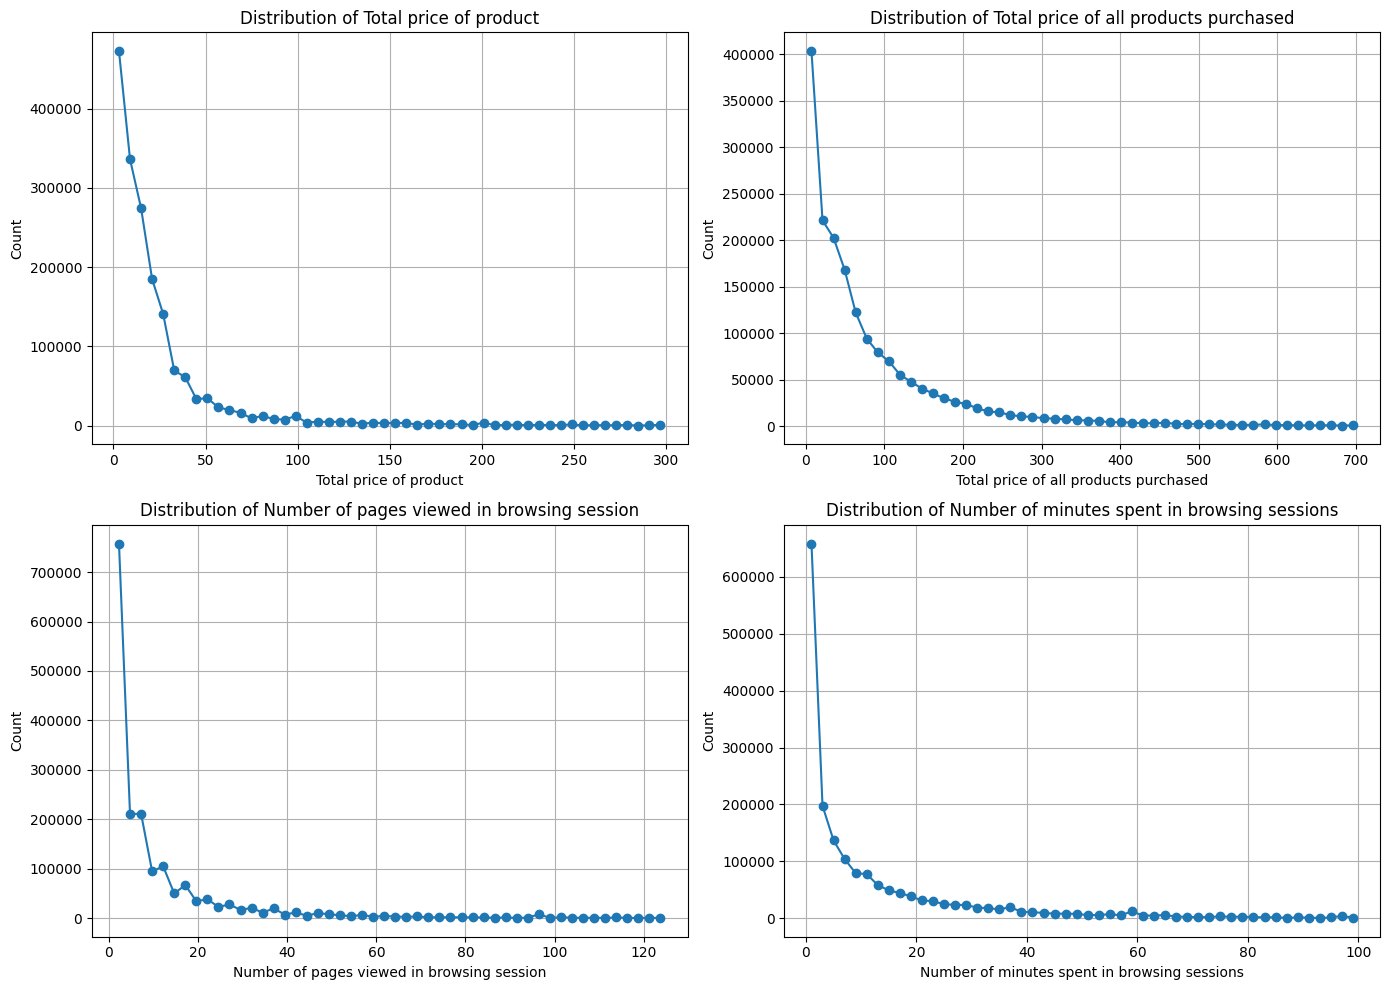

In [24]:
variables = {
    "prod_totprice": "Total price of product",
    "basket_tot": "Total price of all products purchased",
    "pages_viewed": "Number of pages viewed in browsing session",
    "duration": "Number of minutes spent in browsing sessions"
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (var, xlabel) in enumerate(variables.items()):
    # define the boundaries
    upper_limit = df_merged[var].quantile(0.99)
    data = df_merged[df_merged[var] <= upper_limit][var]

    # define the bins
    counts, bin_edges = np.histogram(data, bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # draw the plot
    ax = axes[i]
    ax.plot(bin_centers, counts, marker='o')
    ax.set_title(f'Distribution of {xlabel}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-25-2bda6cb199a1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", n + 2)
<ipython-input-25-2bda6cb199a1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", n + 2)
<ipython-input-25-2bda6cb199a1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", n + 2)
<ipython-input-25-2bda6cb199a1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.

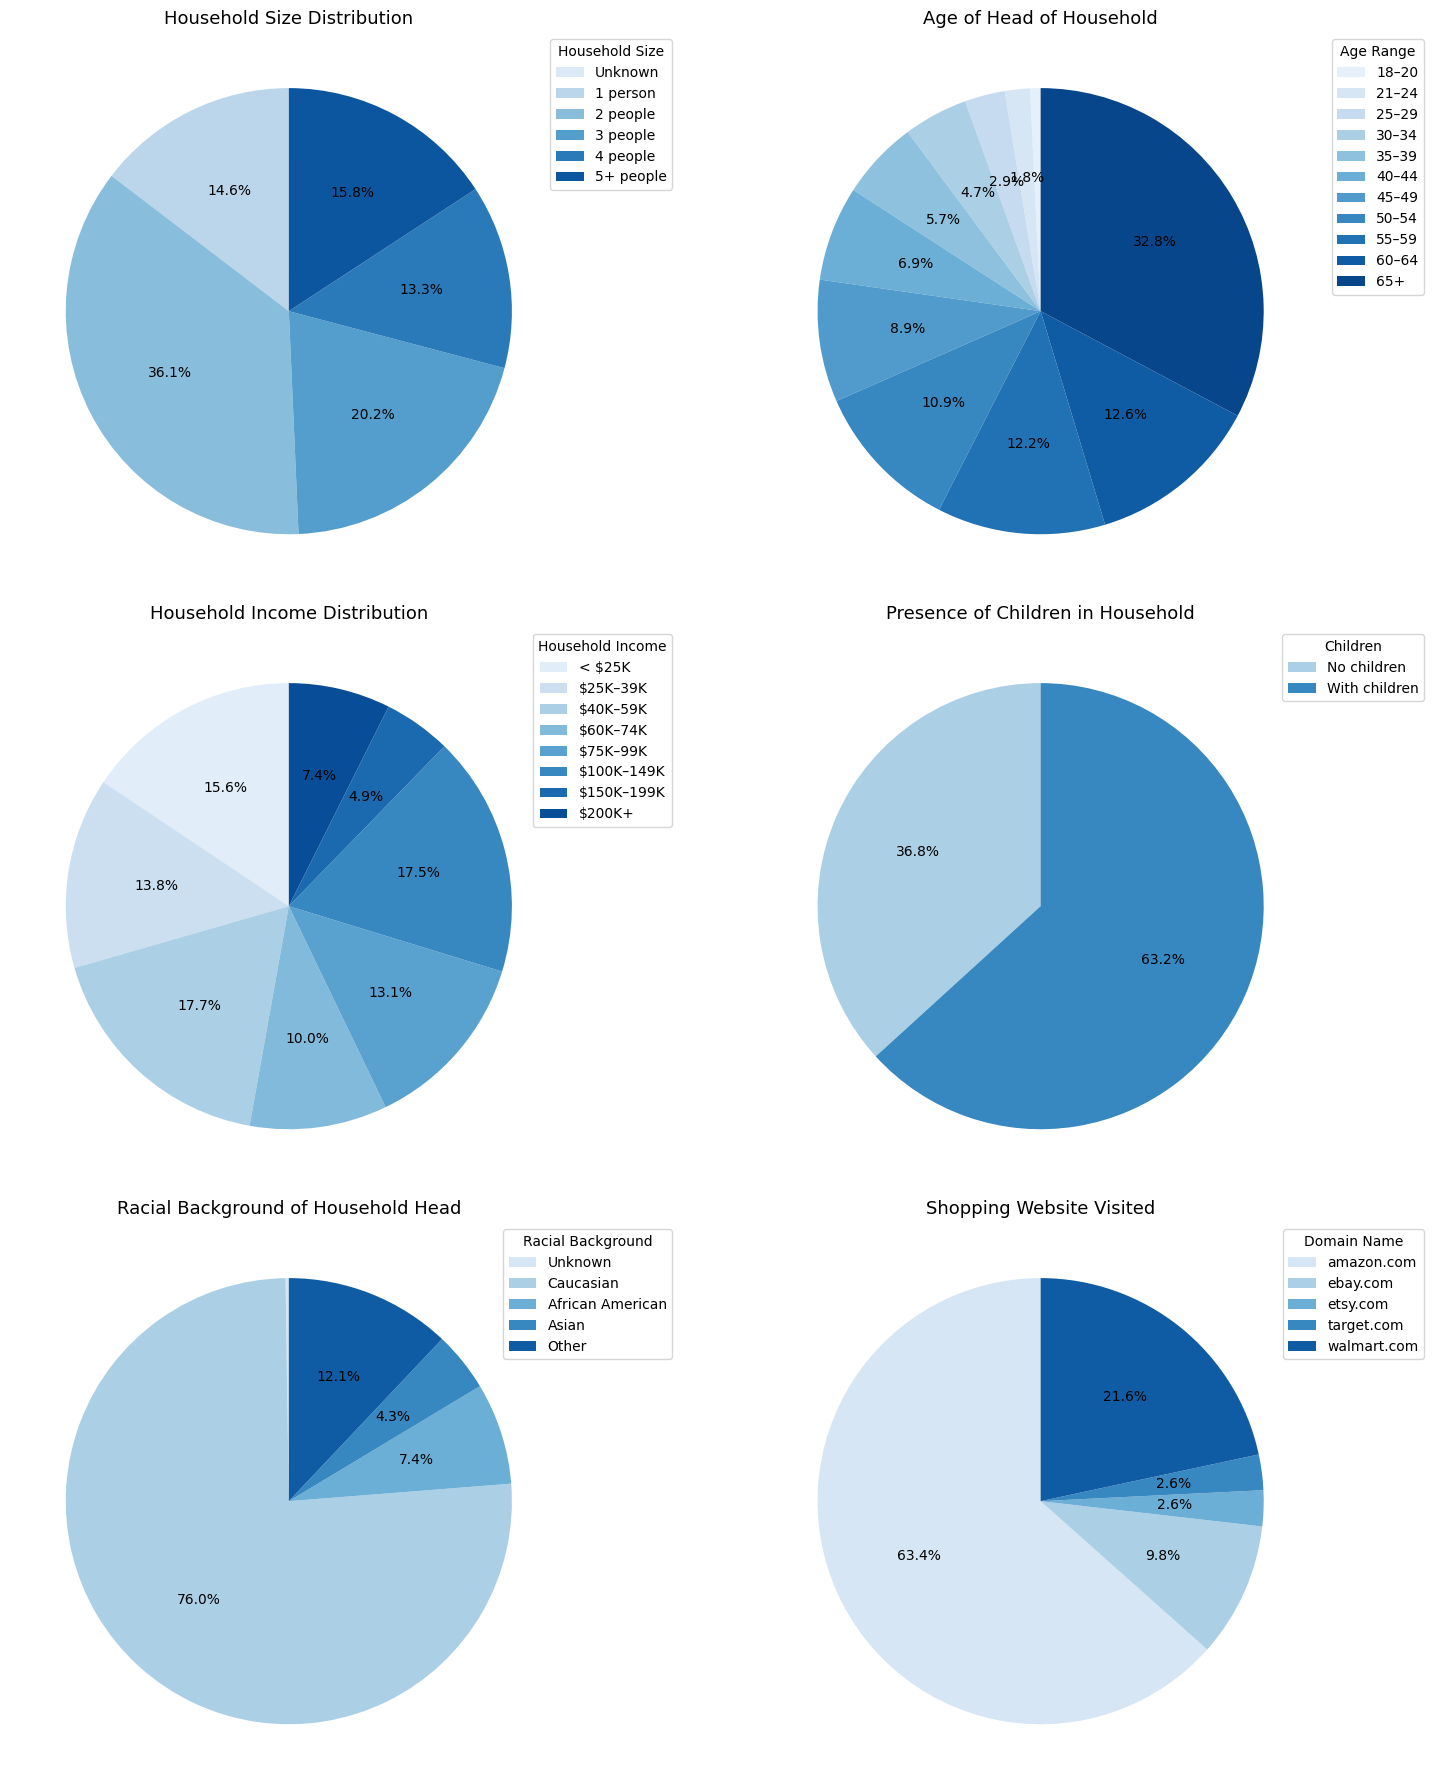

In [25]:
from matplotlib import cm
from matplotlib.colors import to_hex

# Adjust the color to make the figures pretty
def generate_blues(n):
    cmap = cm.get_cmap("Blues", n + 2)
    return [to_hex(cmap(i + 1)) for i in range(n)]

household_size_map = {
    0: 'Unknown',
    1: '1 person',
    2: '2 people',
    3: '3 people',
    4: '4 people',
    5: '5+ people'
}
household_size_order = ['Unknown', '1 person', '2 people', '3 people', '4 people', '5+ people']

hoh_age_map = {
    1: '18–20', 2: '21–24', 3: '25–29', 4: '30–34', 5: '35–39',
    6: '40–44', 7: '45–49', 8: '50–54', 9: '55–59',
    10: '60–64', 11: '65+'
}
hoh_age_order = ['18–20', '21–24', '25–29', '30–34', '35–39', '40–44',
                 '45–49', '50–54', '55–59', '60–64', '65+']

household_income_map = {
    11: '< $25K', 12: '$25K–39K', 13: '$40K–59K', 14: '$60K–74K',
    15: '$75K–99K', 16: '$100K–149K', 17: '$150K–199K', 18: '$200K+'
}
household_income_order = ['< $25K', '$25K–39K', '$40K–59K', '$60K–74K',
                          '$75K–99K', '$100K–149K', '$150K–199K', '$200K+']

children_map = {0: 'No children', 1: 'With children'}
children_order = ['No children', 'With children']

racial_background_map = {
    0: 'Unknown', 1: 'Caucasian', 2: 'African American',
    3: 'Asian', 5: 'Other'
}
racial_order = ['Unknown', 'Caucasian', 'African American', 'Asian', 'Other']


domain_order = None

variables = {
    'household_size': (household_size_map, household_size_order, 'Household Size Distribution', 'Household Size'),
    'hoh_oldest_age': (hoh_age_map, hoh_age_order, 'Age of Head of Household', 'Age Range'),
    'household_income': (household_income_map, household_income_order, 'Household Income Distribution', 'Household Income'),
    'children': (children_map, children_order, 'Presence of Children in Household', 'Children'),
    'racial_background': (racial_background_map, racial_order, 'Racial Background of Household Head', 'Racial Background'),
    'domain_name_x': (None, domain_order, 'Shopping Website Visited', 'Domain Name')
}

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (var, (mapping, custom_order, title, legend_title)) in enumerate(variables.items()):
    ax = axes[i]


    if mapping:
        data = df_merged[var].map(mapping)
    else:
        data = df_merged[var].astype(str)


    if custom_order:
        counts = data.value_counts().reindex(custom_order).dropna()
    else:
        counts = data.value_counts().sort_index()


    colors = generate_blues(len(counts))

# Draw the figures
    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=None,
        autopct=autopct_format,
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )

    ax.set_title(title, fontsize=13)
    ax.legend(wedges, counts.index, title=legend_title, loc="upper right", bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


#Modeling-1: Using K-means to cluster the customers based on their consuming behaviors.

##Step 1: Prepare the features

In [26]:
# Import packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [27]:
# Transform 'hoh_oldest_age' and 'household_income" from one-hot encoding to values since there are different intervals

#let's check the unkown values of the two variables

print("Unknown in hoh_oldest_age:", (df_merged['hoh_oldest_age'] == 99).sum())
print("Unknown in household_income:", (df_merged['household_income'] == 99).sum())


Unknown in hoh_oldest_age: 0
Unknown in household_income: 0


In [28]:
age_max_mapping = {
    1: 20, 2: 24, 3: 29, 4: 35, 5: 39,
    6: 44, 7: 49, 8: 54, 9: 59, 10: 64,
    11: 69, 99: np.nan
}
df_merged['hoh_age_max'] = df_merged['hoh_oldest_age'].map(age_max_mapping)


income_max_mapping = {
    11: 25000, 12: 39999, 13: 59999,
    14: 74999, 15: 99999, 16: 149999,
    17: 199999, 18: 250000, 99: np.nan
}
df_merged['household_income_max'] = df_merged['household_income'].map(income_max_mapping)


In [29]:
# These are the features we would use when clustering, including consuming behaviors and demographic information
features = ["prod_totprice", "basket_tot", "event_time_float","pages_viewed","duration", "household_size", "hoh_age_max", "household_income_max", "children",
       ]

# Make sure there is no missing values in the feature sets
df_kmeans = df_merged[ ["machine_id"] + features].dropna()

# Standarization
X = df_kmeans[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 2: Use elbow method to find the best cluster numbers

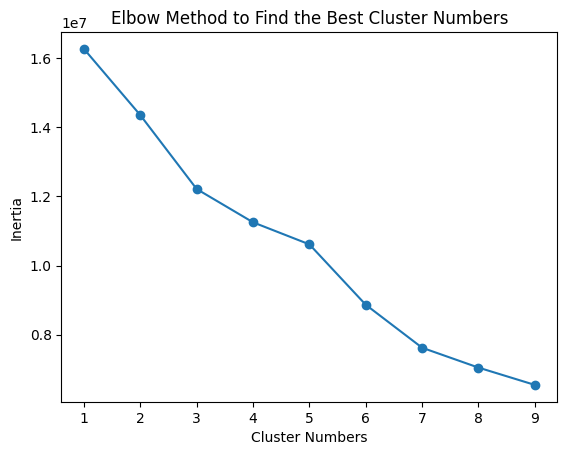

In [30]:
import matplotlib.pyplot as plt
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Method to Find the Best Cluster Numbers")
plt.xlabel("Cluster Numbers")
plt.ylabel("Inertia")
plt.show()


According to the plot, we could infer that the best cluster number is 4.

## Step 3: Make K-Means Model

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

## Step 4: Add the cluster_id labels to the dataset

In [32]:
df_kmeans["cluster_id"] = cluster_labels


## Step 5: Check the results presenting counts of each cluster

<ipython-input-33-8df7de6783e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clusters, x='cluster_id', palette='tab10')


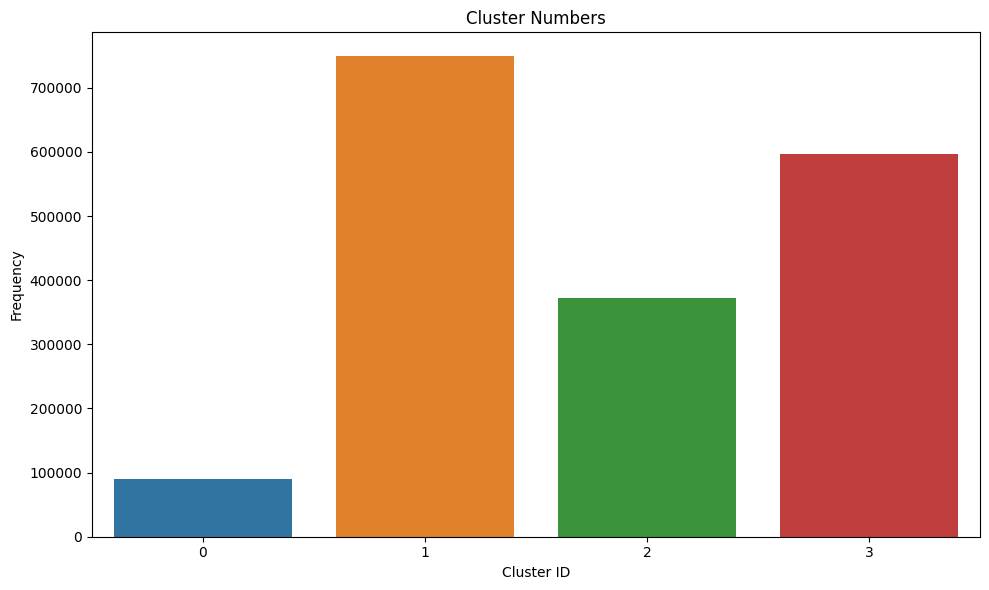

In [33]:
# Draw the plot to visualize the counts of each cluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Put cluster_labels into one DataFrame for convenience
df_clusters = pd.DataFrame({'cluster_id': cluster_labels})

#Set the size of the canva
plt.figure(figsize=(10, 6))

#Draw the plot

sns.countplot(data=df_clusters, x='cluster_id', palette='tab10')

plt.title("Cluster Numbers")
plt.xlabel("Cluster ID")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [34]:
# Here's the actual counts of each cluster
df_kmeans['cluster_id'].value_counts()

,count
cluster_id,
1,748985
3,596460
2,371557
0,90503


Here, we find the noise cluster with the cluster_id of 3, and we would drop it later in the next section.

In [35]:
# Group by cluster_id and apply describe to features
grouped_description = df_kmeans.groupby("cluster_id")[features].mean()
grouped_description

,prod_totprice,basket_tot,event_time_float,pages_viewed,duration,household_size,hoh_age_max,household_income_max,children
cluster_id,,,,,,,,,
0,22.692350,89.263885,13.293450,85.524623,79.527662,2.937892,56.750804,79352.858579,0.691623
1,28.878680,96.136383,18.501549,8.203029,8.725426,3.311725,55.806188,98542.746246,0.973405
2,30.801229,98.643773,3.313118,8.376489,9.404492,3.337989,53.718468,97101.000673,0.945621
3,40.892324,92.382931,14.302303,8.444709,9.718343,1.788443,58.689315,91912.778946,0.000022


In [36]:
df_kmeans.groupby("cluster_id")['prod_totprice'].sum()

,prod_totprice
cluster_id,
0,2.053726e+06
1,2.162970e+07
2,1.144441e+07
3,2.439064e+07


In [37]:
# Check the shape of result
df_kmeans.shape

(1807505, 11)

##Step 6: Add cluster_id to df_merged dataframe for the XG Boost

In [38]:
df_merged.loc[df_kmeans.index, "cluster_id"] = cluster_labels

In [39]:
# Check the result
df_merged.columns

Index(['machine_id', 'site_session_id_x', 'prod_category_id', 'prod_name',
       'domain_id_x', 'prod_qty', 'prod_totprice', 'basket_tot',
       'event_date_x', 'event_time_x', 'domain_name_x',
       'total_transactions_2020', 'total_transactions_2021',
       'total_transactions_2022', 'total_transactions_2023',
       'Product Category ID', 'Report Category', 'Item Category',
       'Item Sub-Category', 'site_session_id_y', 'user_session_id',
       'domain_id_y', 'ref_domain__name', 'pages_viewed', 'duration',
       'event_date_y', 'event_time_y', 'hoh_most_education', 'census_region',
       'household_size', 'hoh_oldest_age', 'household_income', 'children',
       'racial_background', 'connection_speed', 'hispanic', 'zip_code',
       'domain_name_y', 'event_time_hm', 'event_time_hm_dt',
       'event_time_float', 'household_income_dollar', 'hoh_oldest_age_median',
       'hoh_age_max', 'household_income_max', 'cluster_id'],
      dtype='object')

In [40]:
pd.crosstab(df_merged["cluster_id"], df_merged["domain_name_x"], normalize='index') * 100

domain_name_x,amazon.com,ebay.com,etsy.com,target.com,walmart.com
cluster_id,,,,,
0.0,68.880590,9.535596,2.002144,1.476194,18.105477
1.0,61.265446,7.786137,2.632496,3.108206,25.207714
2.0,63.754955,9.859860,2.872238,2.642125,20.870822
3.0,65.088187,12.238373,2.463535,2.028803,18.181102


In [41]:
pd.crosstab(df_merged["cluster_id"], df_merged["hispanic"], normalize='index') * 100

hispanic,0.0,1.0,99.0
cluster_id,,,
0.0,82.305559,17.526491,0.167950
1.0,86.982650,12.724687,0.292663
2.0,84.103919,15.569078,0.327002
3.0,88.551621,11.329846,0.118533


##Step 7: Visualization of clusters

<ipython-input-46-17498f9d0366>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster_label'] = df_filtered['cluster_id'].map(cluster_labels)
<ipython-input-46-17498f9d0366>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['event_month'] = df_filtered['event_date_x'].dt.to_period('M').dt.to_timestamp()


<Figure size 1200x600 with 0 Axes>

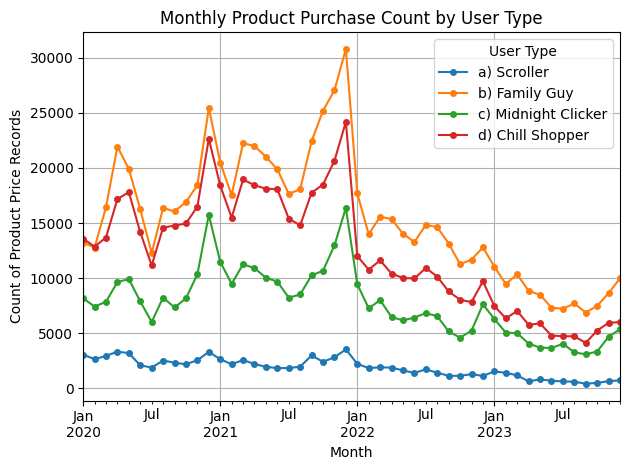

In [46]:
# Convert event_date_x to datetime
df_merged['event_date_x'] = pd.to_datetime(df_merged['event_date_x'], errors='coerce')

# Filter valid date range
df_filtered = df_merged[(df_merged['event_date_x'].dt.year >= 2020) & (df_merged['event_date_x'].dt.year <= 2023)]

# Convert cluster_id to user label
cluster_labels = {
    0: "a) Scroller",
    1: "b) Family Guy",
    2: "c) Midnight Clicker",
    3: "d) Chill Shopper"
}
df_filtered['cluster_label'] = df_filtered['cluster_id'].map(cluster_labels)

# Extract month
df_filtered['event_month'] = df_filtered['event_date_x'].dt.to_period('M').dt.to_timestamp()

# Group and pivot
monthly_counts = df_filtered.groupby(['event_month', 'cluster_label'])['prod_totprice'].count().reset_index()
pivot_monthly = monthly_counts.pivot(index='event_month', columns='cluster_label', values='prod_totprice')

# Plot
plt.figure(figsize=(12, 6))
pivot_monthly.plot(marker='o', markersize=4)
plt.xlabel('Month')
plt.ylabel('Count of Product Price Records')
plt.title('Monthly Product Purchase Count by User Type')
plt.legend(title='User Type')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-49-449518700b33>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['event_hour'] = pd.to_datetime(df_merged['event_time_hm_dt'].astype(str)).dt.hour


<Figure size 1200x600 with 0 Axes>

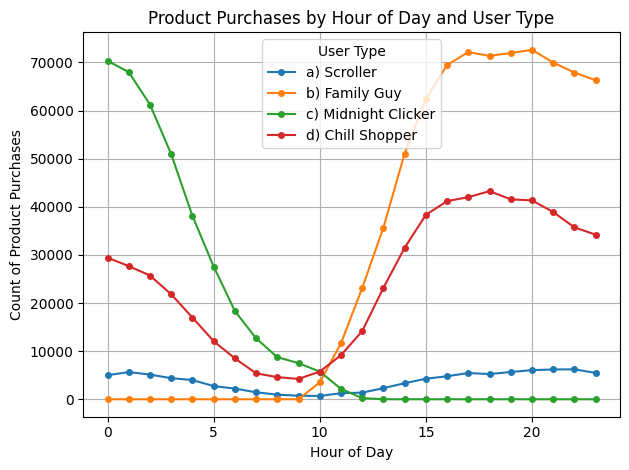

In [49]:
# Extract hour from event_time_hm_dt
df_merged['event_hour'] = pd.to_datetime(df_merged['event_time_hm_dt'].astype(str)).dt.hour

# Map cluster_id to label again if needed
df_merged['cluster_label'] = df_merged['cluster_id'].map(cluster_labels)

# Group and pivot
hourly_counts = df_merged.groupby(['event_hour', 'cluster_label'])['prod_totprice'].count().reset_index()
pivot_hourly = hourly_counts.pivot(index='event_hour', columns='cluster_label', values='prod_totprice').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
pivot_hourly.plot(marker='o', markersize=4)
plt.xlabel('Hour of Day')
plt.ylabel('Count of Product Purchases')
plt.title('Product Purchases by Hour of Day and User Type')
plt.legend(title='User Type')
plt.grid(True)
plt.tight_layout()
plt.show()

#Modeling-2: Using XG Boost with demographic information to predict which type the customers belong to based on the K-Means results.

## Step 1: Prepare for XGBoost training based on demographic features to predict cluster_id

In [50]:
# Import packages
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 1.8 MB/s eta 0:00:00


In [51]:
# Demographic features to be used for XGBoost
demo_features = [
    "hoh_most_education",
    "census_region",
    "household_size",
    "hoh_age_max",
    "household_income_max",
    "children",
    "racial_background",
    "hispanic",
]

# Drop missing values to ensure clean training data
df_model = df_merged.dropna(subset=demo_features + ['cluster_id'])

# Separate predictors and target
X = df_model[demo_features]
y = df_model["cluster_id"].astype(int)


## Step 2: Train and test the model of XG Boost

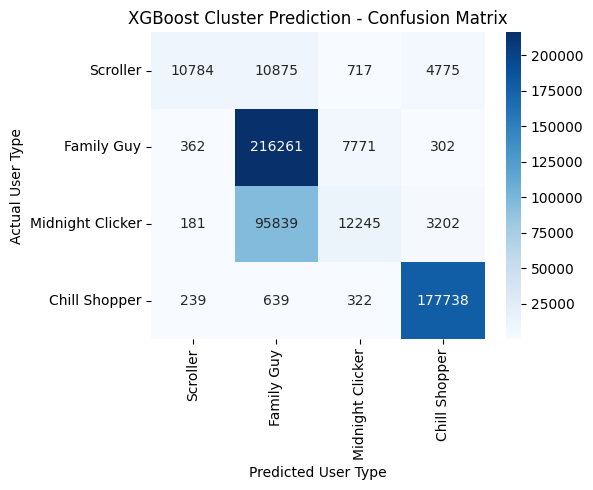

In [58]:
# cluster label
cluster_labels = {
    0: "Scroller",
    1: "Family Guy",
    2: "Midnight Clicker",
    3: "Chill Shopper"
}
label_names = [cluster_labels[i] for i in sorted(cluster_labels)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)
plt.title("XGBoost Cluster Prediction - Confusion Matrix")
plt.xlabel("Predicted User Type")
plt.ylabel("Actual User Type")
plt.tight_layout()
plt.show()

## Step 3: Anlalyze the result

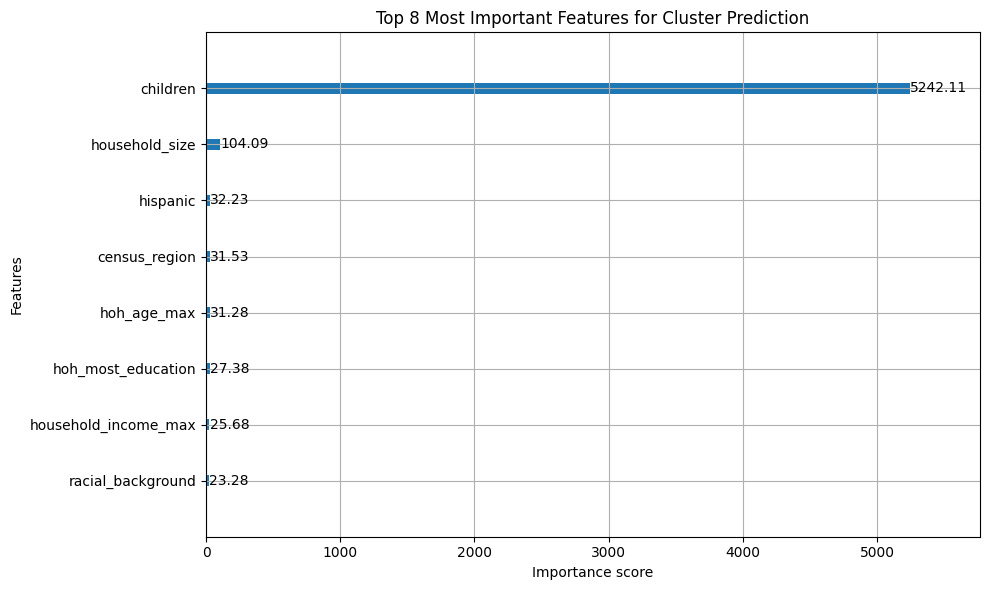

In [53]:
from xgboost import plot_importance

# Draw the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Close the automatic labels on each histogram
plot_importance(
    xgb_model,
    max_num_features=8,
    importance_type='gain',
    ax=ax,
    show_values=False
)

plt.title("Top 8 Most Important Features for Cluster Prediction")


# Add the label with two-digits decimals
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,
            p.get_y() + p.get_height() / 2,
            f"{width:.2f}",
            va='center')

plt.tight_layout()
plt.show()

## Step 4: Evaluate the model with metrics

In [54]:
from sklearn.model_selection import cross_validate

# Drag our model back
xgb_model = XGBClassifier(random_state=42)

# Make 10-fold cross validation on the total dataset
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
}


In [55]:
results = cross_validate(xgb_model, X, y, cv=10, scoring=scoring, return_train_score=False)

In [56]:
for metric in results:
    if "test" in metric:
        print(f"{metric}: {results[metric].mean():.4f}")

test_accuracy: 0.7616
test_f1_macro: 0.6047


In [57]:
df_merged.columns

Index(['machine_id', 'site_session_id_x', 'prod_category_id', 'prod_name',
       'domain_id_x', 'prod_qty', 'prod_totprice', 'basket_tot',
       'event_date_x', 'event_time_x', 'domain_name_x',
       'total_transactions_2020', 'total_transactions_2021',
       'total_transactions_2022', 'total_transactions_2023',
       'Product Category ID', 'Report Category', 'Item Category',
       'Item Sub-Category', 'site_session_id_y', 'user_session_id',
       'domain_id_y', 'ref_domain__name', 'pages_viewed', 'duration',
       'event_date_y', 'event_time_y', 'hoh_most_education', 'census_region',
       'household_size', 'hoh_oldest_age', 'household_income', 'children',
       'racial_background', 'connection_speed', 'hispanic', 'zip_code',
       'domain_name_y', 'event_time_hm', 'event_time_hm_dt',
       'event_time_float', 'household_income_dollar', 'hoh_oldest_age_median',
       'hoh_age_max', 'household_income_max', 'cluster_id', 'event_hour',
       'cluster_label'],
      dtype='o